In [1]:
%run jupyterQ.ipynb

NameError: name 'proj_num' is not defined

NameError: name 'proj_num' is not defined

### Trace
\begin{equation}
\mathrm{Tr}(A) = \sum_{j=1}^{d}A_{j,j}.
\end{equation}

In [ ]:
def trace(A):
    d = A.shape[0]; tr = 0
    for j in range(0,d):
        tr += A[j,j]
    return tr

# Partial trace
\begin{align}
\rho_{b}[j,k] & = \sum_{l=0}^{d_{a}-1}\rho[(l-1)d_{b}+j,(l-1)d_{b}+k], \\
\rho_{a}[j,k] & = \sum_{l=0}^{d_{b}-1}\rho[(j-1)d_{b}+l,(k-1)d_{b}+l].
\end{align}

In [11]:
# Outside these functions, initialize: rhos = zeros(ds,ds), s=A,B
def ptraceA(da, db, rho):
    rhoB = zeros(db,db)
    for j in range(0, db):
        for k in range(0, db):
            for l in range(0, da):
                rhoB[j,k] += rho[l*db+j,l*db+k]
    return rhoB

def ptraceB(da, db, rho):
    rhoA = zeros(da,da)
    for j in range(0, da):
        for k in range(0, da):
            for l in range(0, db):
                rhoA[j,k] += rho[j*db+l,k*db+l]
    return rhoA

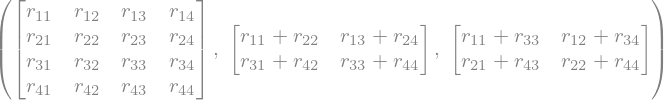

In [15]:
r11,r22,r33,r44 = symbols('r_{11} r_{22} r_{33} r_{44}', Positive=True)
r12,r13,r14,r21,r23,r24 = symbols('r_{12} r_{13} r_{14} r_{21} r_{23} r_{24}')
r31,r32,r34,r41,r42,r43 = symbols('r_{31} r_{32} r_{34} r_{41} r_{42} r_{43}')
rhoAB = Matrix([[r11,r12,r13,r14],[r21,r22,r23,r24],[r31,r32,r33,r34],[r41,r42,r43,r44]])
rhoA = ptraceB(2,2,rhoAB); rhoB = ptraceA(2,2,rhoAB); rhoAB, rhoA, rhoB

In [9]:
def pTraceL_num(dl, dr, rhoLR):
    # Returns the left partial trace over the 'left' subsystem of rhoLR
    rhoR = np.zeros((dr, dr), dtype=complex)
    for j in range(0, dr):
        for k in range(j, dr):
            for l in range(0, dl):
                rhoR[j,k] += rhoLR[l*dr+j,l*dr+k]
            if j != k:
                rhoR[k,j] = np.conj(rhoR[j,k])
    return rhoR


def pTraceR_num(dl, dr, rhoLR):
    # Returns the right partial trace over the 'right' subsystem of rhoLR
    rhoL = np.zeros((dl, dl), dtype=complex)
    for j in range(0, dl):
        for k in range(j, dl):
            for l in range(0, dr):
                rhoL[j,k] += rhoLR[j*dr+l,k*dr+l]
        if j != k:
            rhoL[k,j] = np.conj(rhoL[j,k])
    return rhoL

In [21]:
#%run init.ipynb
#psi = bell(0,0); rho = proj(psi); rhor = pTraceR_num(2, 2, rho); print(rhor) # ok!

In [26]:
def partial_trace_3_num(rho_abc, da, db, dc):
    rho_ac = np.zeros(da*dc*da*dc).reshape(da*dc,da*dc)
    for j in range(0,da):
        for l in range(0,dc):
            cj = j*dc+l
            ccj = j*db*dc+l
            for m in range(0,da):
                for o in range(0,dc):
                    ck = m*dc+o
                    cck = m*db*dc+o
                    for k in range(0,db):
                        rho_ac[cj,ck] = rho_ac[cj,ck] + rho_abc[ccj+k*dc,cck+k*dc]
    return rho_ac

In [24]:
psi_ghz = (1/sqrt(2))*(np.array([[1],[0],[0],[0],[0],[0],[0],[0]])+np.array([[0],[0],[0],[0],[0],[0],[0],[1]]))
rho_ghz = psi_ghz*psi_ghz.T
print(rho_ghz)

[[1/2 0 0 0 0 0 0 1/2]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1/2 0 0 0 0 0 0 1/2]]


In [25]:
rho_ac = partial_trace_3(rho_ghz,2,2,2)
rho_ac

array([[0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5]])

In [27]:
psi_w = (1/sqrt(3))*(np.array([[0],[1],[0],[0],[0],[0],[0],[0]])
                     +np.array([[0],[0],[1],[0],[0],[0],[0],[0]])
                    +np.array([[0],[0],[0],[0],[1],[0],[0],[0]]))
rho_w = psi_w*psi_w.T
print(rho_w)

[[0 0 0 0 0 0 0 0]
 [0 1/3 1/3 0 1/3 0 0 0]
 [0 1/3 1/3 0 1/3 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1/3 1/3 0 1/3 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [28]:
rho_ac = partial_trace_3(rho_w,2,2,2)
rho_ac

array([[0.33333333, 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

# Transposta parcial
Por definição, os elementos da representação matricial de um operador linear $A$ em uma base ortonormal $\{|\alpha_{j}\rangle\}$ e a matriz transposta associada são relacionados por
\begin{equation}
\langle\alpha_{j}|A^{T}|\alpha_{k}\rangle = \langle\alpha_{k}|A|\alpha_{j}\rangle.
\end{equation}
Para $c_{j,k}$ escalares, podemos obter essa mesma relação definindo a transposta via o seguinte mapa linear [arXiv:1609.00323]:
\begin{equation}
T\left(\sum_{j,k}c_{j,k}|\alpha_{j}\rangle\langle\alpha_{k}|\right):=\sum_{j,k}c_{j,k}T(|\alpha_{j}\rangle\langle\alpha_{k}|):=\sum_{j,k}c_{j,k}|\alpha_{k}\rangle\langle\alpha_{j}|.
\end{equation}
Para verificar essa afirmação, consideramos a representação produto externo $A=\sum_{j,k}\langle\alpha_{j}|A|\alpha_{k}\rangle|\alpha_{j}\rangle\langle\alpha_{k}|$ e atuamos essa função:
\begin{align}
T(A) & = T\left(\sum_{j,k}\langle\alpha_{j}|A|\alpha_{k}\rangle|\alpha_{j}\rangle\langle\alpha_{k}|\right) = \sum_{j,k}\langle\alpha_{j}|A|\alpha_{k}\rangle T(|\alpha_{j}\rangle\langle\alpha_{k}|)  \\
& = \sum_{j,k}\langle\alpha_{j}|A|\alpha_{k}\rangle |\alpha_{k}\rangle\langle\alpha_{j}|.
\end{align}
Assim,
\begin{align}
\langle\alpha_{p}|T(A)|\alpha_{q}\rangle & = \sum_{j,k}\langle\alpha_{j}|A|\alpha_{k}\rangle \langle\alpha_{p}|\alpha_{k}\rangle\langle\alpha_{j}|\alpha_{q}\rangle = \sum_{j,k}\langle\alpha_{j}|A|\alpha_{k}\rangle \delta_{p,k}\delta_{j,q} \\
& = \langle\alpha_{q}|A|\alpha_{p}\rangle.
\end{align}

_OBS:_ Vimos que os autovalores da transposta são iguais aos autovalores da matriz original. Então, pelo motivo da transposta levar matrizes positivas em matrizes positivas, dizemos que ela é uma __mapa positivo__ (semidefinido). Ou seja,
\begin{equation}
T(A)\ge\mathbb{0}_{\mathcal{H}}\text{ }\forall A\ge\mathbb{0}_{\mathcal{H}}.
\end{equation}

Quando aplicamos a um sistema composto, a função matricial __transposta parcial__ é definida, quando aplicada ao espaço da "esquerda", como
\begin{align}
T_{e}(C) & := T\otimes id(C) \\
& = \sum_{j,p=1}^{n}\sum_{k,q=1}^{m}C_{jk,pq}T(|\alpha_{j}\rangle\langle\alpha_{p}|)\otimes id(|\beta_{k}\rangle\langle\beta_{q}|) \\
& := \sum_{j,p=1}^{n}\sum_{k,q=1}^{m}C_{jk,pq}|\alpha_{p}\rangle\langle\alpha_{j}|)\otimes |\beta_{k}\rangle\langle\beta_{q}|.
\end{align}
E assim (__exercício__)
\begin{equation}
C_{jk,pq}=(T_{e}(C))_{pk,jq}\therefore(\langle\alpha_{p}|\otimes\langle\beta_{k}|)T_{e}(C)(|\alpha_{j}\rangle\otimes|\beta_{q}\rangle) = (\langle\alpha_{j}|\otimes\langle\beta_{k}|)C(|\alpha_{p}\rangle\otimes|\beta_{q}\rangle).
\end{equation}

Dizemos que um mapa positivo $M$ é __completamente positivo__ se
\begin{equation}
M\otimes id(C)\ge\mathbb{0}\text{ }\forall C\ge\mathbb{0}$.
\end{equation}
Uma propriedade importante da transposta é que esta função _não_ é um mapa completamente positivo. Para verificar essa afirmação, consideremos
\begin{align}
T_{e}(P_{\Psi}) & = 2^{-1}[T(|e_{1}\rangle\langle e_{1}|)\otimes id(|e_{2}\rangle\langle e_{2}|) - T(|e_{1}\rangle\langle e_{2}|)\otimes id(|e_{2}\rangle\langle e_{1}|)  \\ 
& \hspace{1cm} - T(|e_{2}\rangle\langle e_{1}|)\otimes id(|e_{1}\rangle\langle e_{2}|) + T(|e_{2}\rangle\langle e_{2}|)\otimes id(|e_{1}\rangle\langle e_{1}|)] \\
& = 2^{-1}[|e_{1}\rangle\langle e_{1}|\otimes|e_{2}\rangle\langle e_{2}| - |e_{2}\rangle\langle e_{1}|\otimes|e_{2}\rangle\langle e_{1}|  - |e_{1}\rangle\langle e_{2}|)\otimes|e_{1}\rangle\langle e_{2}| + |e_{2}\rangle\langle e_{2}|\otimes|e_{1}\rangle\langle e_{1}|] \\
& = \begin{bmatrix} 0&0&0&-1/2 \\ 0&1/2&0&0 \\ 0&0&1/2&0 \\ -1/2&0&0&0 \end{bmatrix},
\end{align}
com a representação matricial feita usando a base $\{|e_{1}\rangle\otimes|e_{1}\rangle,|e_{1}\rangle\otimes|e_{2}\rangle,|e_{2}\rangle\otimes|e_{1}\rangle,|e_{2}\rangle\otimes|e_{2}\rangle\}$. Para exemplificar o cálculo dos elementos de matriz, usemos $(A\otimes B)(C\otimes D)=AC\otimes BD$ e consideremos explicitamente
\begin{align}
(\langle e_{1}|\otimes\langle e_{1}|)T_{e}(P_{\Psi})(|e_{1}\rangle\otimes|e_{1}\rangle) =
& (\langle e_{1}|\otimes\langle e_{1}|)(|e_{1}\rangle\langle e_{1}|\otimes|e_{2}\rangle\langle e_{2}|)(|e_{1}\rangle\otimes|e_{1}\rangle) 
 - (\langle e_{1}|\otimes\langle e_{1}|)(|e_{2}\rangle\langle e_{1}|\otimes|e_{2}\rangle\langle e_{1}|)(|e_{1}\rangle\otimes|e_{1}\rangle) \\
& - (\langle e_{1}|\otimes\langle e_{1}|)(|e_{1}\rangle\langle e_{2}|)\otimes|e_{1}\rangle\langle e_{2}|)(|e_{1}\rangle\otimes|e_{1}\rangle) 
 + (\langle e_{1}|\otimes\langle e_{1}|)(|e_{2}\rangle\langle e_{2}|\otimes|e_{1}\rangle\langle e_{1}|)(|e_{1}\rangle\otimes|e_{1}\rangle) \\
 = & \langle e_{1}|e_{1}\rangle\langle e_{1}|e_{1}\rangle\otimes\langle e_{1}|e_{2}\rangle\langle e_{2}|e_{1}\rangle 
 - \langle e_{1}|e_{2}\rangle\langle e_{1}|e_{1}\rangle\otimes\langle e_{1}|e_{2}\rangle\langle e_{1}||e_{1}\rangle \\
& - \langle e_{1}|e_{1}\rangle\langle e_{2}|e_{1}\rangle\otimes\langle e_{1}|e_{1}\rangle\langle e_{2}|e_{1}\rangle 
 + \langle e_{1}|e_{2}\rangle\langle e_{2}|e_{1}\rangle\otimes\langle e_{1}|e_{1}\rangle\langle e_{1}|e_{1}\rangle \\
 &= 0.
\end{align}

Como verificado usando o código abaixo, $T_{e}(P_{\Psi})$ possui um autovalor negativo equanto que os autovalores de $P_{\Psi}$ são todos positivos ou nulos.

__Exercício:__ Obtenha $P_{\Phi}$ e $T_{d}(P_{\Phi})$ e calcule seus autovalores.

In [5]:
def ptranspose(da,db,rho,ssys):
    ptp = zeros(da*db,da*db)
    if ssys == 'b':
        for ja in range(0,da):
            for ka in range(0,da):
                for jb in range(0,db):
                    for kb in range(0,db):
                        ptp[ja*db+kb,ka*db+jb] = rho[ja*db+jb,ka*db+kb]
    elif ssys == 'a':
        for ja in range(0,da):
            for ka in range(0,da):
                for jb in range(0,db):
                    for kb in range(0,db):
                        ptp[ka*db+jb,ja*db+kb] = rho[ja*db+jb,ka*db+kb]
    return ptp

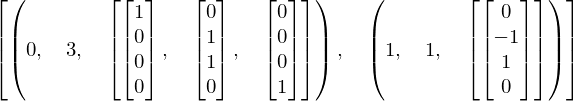

In [6]:
# para a matriz P_{Psi}
Psi = Matrix([[0],[1/sqrt(2)],[-1/sqrt(2)],[0]])
P_Psi = proj(Psi)
P_Psi
P_Psi.eigenvects()

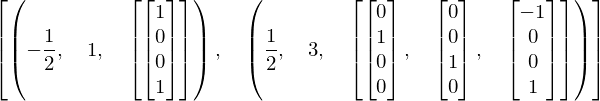

In [7]:
# para a transposta parcial
P_Psi_ptp = ptranspose(2,2,P_Psi,'a')
P_Psi_ptp
P_Psi_ptp.eigenvects()